In [20]:
import sklearn
print(sklearn.__version__)

1.1.3


In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
# CSV 파일 불러오기
df = pd.read_csv(r'C:\Users\gadi2\OneDrive\바탕 화면\study file\onlinefoods.csv')
df.head(100)

# 데이터 확인
print(df.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [35]:
# 데이터 프레임에 대한 정보를 불러온다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [36]:
# 결측치 유무를 찾는 any매소드이다. 있으면 true, 없으면 false이다.
df.isna().any()

Age                           False
Gender                        False
Marital Status                False
Occupation                    False
Monthly Income                False
Educational Qualifications    False
Family size                   False
latitude                      False
longitude                     False
Pin code                      False
Output                        False
Feedback                      False
Unnamed: 12                   False
dtype: bool

In [37]:
# 데이터의 항목들을 보여주는 것
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [38]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

In [39]:
df.select_dtypes([int,float]).corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


In [40]:
yes_nos = df['Unnamed: 12'].value_counts()

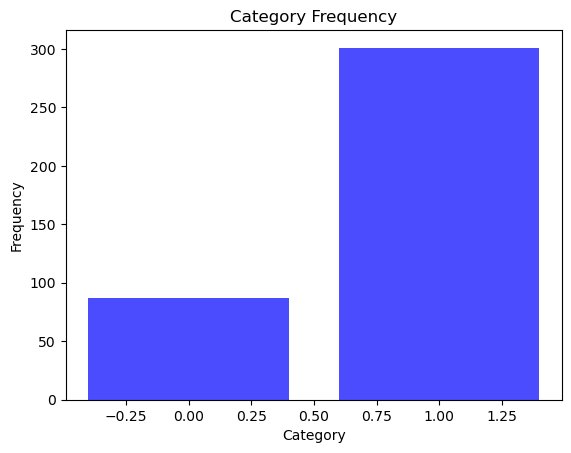

In [41]:
plt.bar(yes_nos.index, yes_nos.values, color='blue', alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category Frequency')
plt.show()

In [42]:
x = df.drop(columns=['Feedback']).values
y = df['Feedback'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = DecisionTreeClassifier(max_depth=9)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [44]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 9  4]
 [11 54]]
0.8076923076923077
